# Tarea 8
## Pruebas no paramétricas Mann Whitney

Importar paqueterias

In [3]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [4]:
# Path to the file to be imported
path = "../data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
terminos = import_csv(path)

In [9]:
terminos.head()

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0


Define Mann Whitney test as custom function

In [5]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05):
    """
    Performs the Mann-Whitney U test and prints U statistic, p-value, and result.
    """
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    
    print(f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")

Make a boxplot to explore data and infer possible results

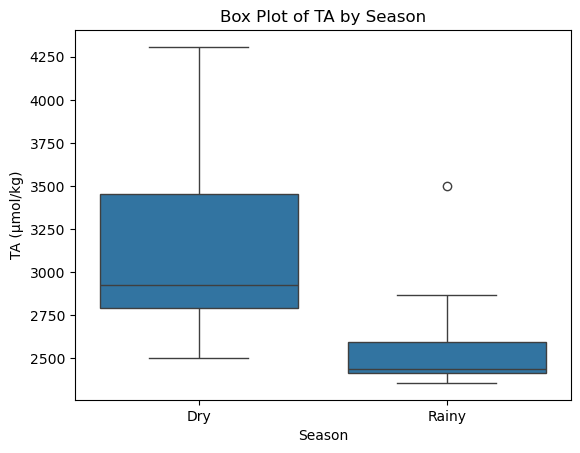

In [6]:
# Plot the box plot of TA by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='ta_micromol_kg', data=terminos)
#sns.swarmplot(x='season', y='sal_psu', data=co2_data, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('TA (μmol/kg)')
plt.title('Box Plot of TA by Season')

# Show the plot
plt.show()

Execute Mann Witney test among season category

In [7]:
# Filter the TA data by season
ta_dry = terminos.loc[terminos["season"] == "Dry", "ta_micromol_kg"]
ta_rainy = terminos.loc[terminos["season"] == "Rainy", "ta_micromol_kg"]

# Perform the Mann-Whitney U test for TA between dry and rainy seasons
mann_whitney_test(ta_dry, ta_rainy)

U statistic = 2251.5
p-value = 3.618607122062942e-12
The difference is statistically significant.


There were significant differences between seasons. this is reinforced with boxplot observations
Now assesing other variable; **salinity**

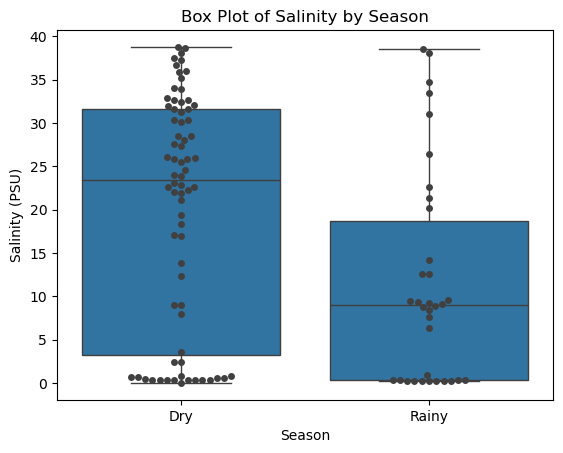

In [12]:
# Plot the box plot of salinity by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='sal_psu', data=terminos)
sns.swarmplot(x='season', y='sal_psu', data=terminos, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Salinity (PSU)')
plt.title('Box Plot of Salinity by Season')

# Show the plot
plt.show()

Differences among seasons are not as marked as in TA data. 

In [13]:
# Filter the salinity data by season
sal_dry = terminos.loc[terminos["season"] == "Dry", "sal_psu"]
sal_rainy = terminos.loc[terminos["season"] == "Rainy", "sal_psu"]

# Perform the Mann-Whitney U test for salinity between dry and rainy seasons
mann_whitney_test(sal_dry, sal_rainy)

U statistic = 1660.0
p-value = 0.003199701027350606
The difference is statistically significant.


Salinity differences are statistically significant despite simmilarities observed in boxplot. Graphically we can see that differences are percetible in data distribution, as high salinity values for dry are more abundant than thos on rainy season. A plot that can help see this is violin plots:

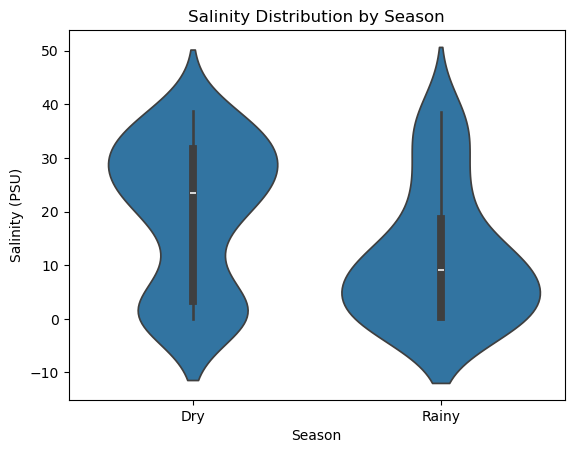

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a violin plot
sns.violinplot(x='season', y='sal_psu', data=terminos)

plt.title('Salinity Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Salinity (PSU)')
plt.show()

# Exercise 8
## "Evaluate the Mann-Whitney U test for DIC and temperature. Create boxplots and violin plots for these analyses."

### DIC
Evaluate visually using boxplots and violin plots

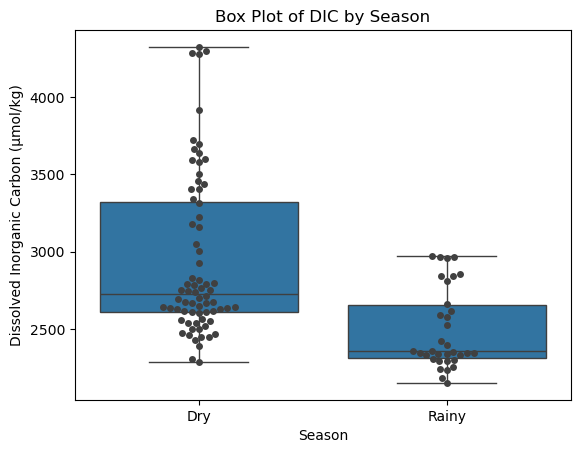

In [16]:
# Create a box plot
sns.boxplot(x='season', y='dic_micromol_kg', data=terminos)
sns.swarmplot(x='season', y='dic_micromol_kg', data=terminos, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Dissolved Inorganic Carbon (μmol/kg)')
plt.title('Box Plot of DIC by Season')

# Show the plot
plt.show()

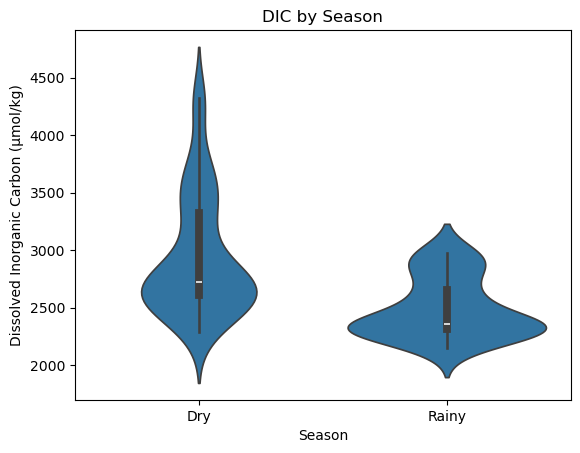

In [ ]:
# Create a violin plot
sns.violinplot(x='season', y='dic_micromol_kg', data=terminos)

plt.title('DIC by Season')
plt.xlabel('Season')
plt.ylabel('Dissolved Inorganic Carbon (μmol/kg)')
plt.show()

Diffrences are noticable, but wee need to evaluate using Mann Whitney

In [ ]:
# Filter the DIC data by season
dic_dry = terminos.loc[terminos["season"] == "Dry", "dic_micromol_kg"]
dic_rainy = terminos.loc[terminos["season"] == "Rainy", "dic_micromol_kg"]

# Perform the Mann-Whitney U test for DIC between dry and rainy seasons
mann_whitney_test(dic_dry, dic_rainy)

U statistic = 1942.5
p-value = 1.1746695070093673e-06
The difference is statistically significant.


There are significant differences in DIC data among seasons

## Temperature
evaluate boxplots and violin plots

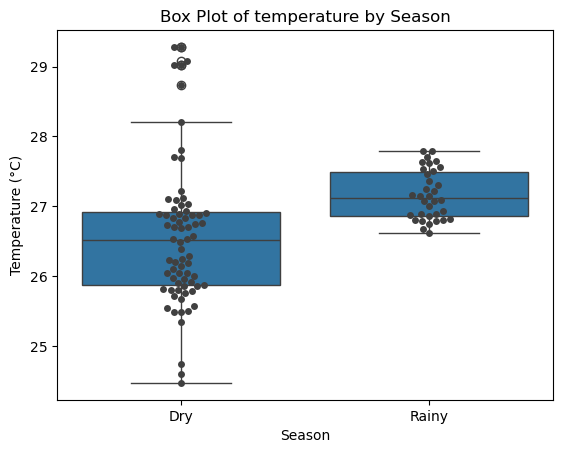

In [19]:
# Create a box plot
sns.boxplot(x='season', y='temp_c', data=terminos)
sns.swarmplot(x='season', y='temp_c', data=terminos, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.title('Box Plot of temperature by Season')

# Show the plot
plt.show()

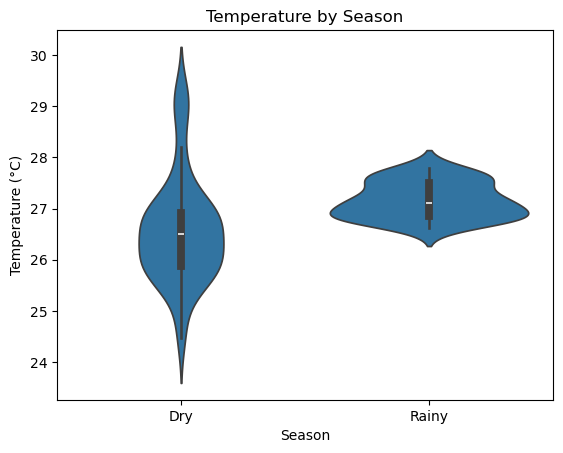

In [20]:
# Create a violin plot
sns.violinplot(x='season', y='temp_c', data=terminos)

plt.title('Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.show()

Data seems very different based on plots

In [22]:
# Filter the temperature data by season
temp_dry = terminos.loc[terminos["season"] == "Dry", "temp_c"]
temp_rainy = terminos.loc[terminos["season"] == "Rainy", "temp_c"]

# Perform the Mann-Whitney U test for temperature between dry and rainy seasons
mann_whitney_test(temp_dry, temp_rainy)

U statistic = 551.0
p-value = 5.317160670684041e-06
The difference is statistically significant.


There were significant differences in temperature data amons seasons